In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [85]:
gini_filepath = "../../dataset/asia-gini-id/API_SI.POV.GINI_DS2_en_csv_v2_3889035.csv"
unemp_filepath = "../../dataset/asia-unemployment-rate/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_3919484.csv"
md_filepath = "../../dataset/asia-gini-id/Metadata_Country_API_SI.POV.GINI_DS2_en_csv_v2_3889035.csv"
gdp_filepath = "../../dataset/gdp/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4019306.csv"

md = pd.read_csv(md_filepath, on_bad_lines='skip')
gini_data = pd.read_csv(gini_filepath, skiprows=4)
unemp_data = pd.read_csv(unemp_filepath, skiprows=4)
gdp_data = pd.read_csv(gdp_filepath, skiprows=4) 

In [31]:
#forward fill to get most recent input
gini_data['Most Recent'] = gini_data.ffill(axis=1).iloc[:, -1]
gini_data['Most Recent'].replace({"SI.POV.GINI": np.nan}, inplace=True) 

gdp_data['Most Recent'] = gdp_data.ffill(axis=1).iloc[:, -1]
gdp_data['Most Recent'].replace({"NY.GDP.MKTP.CD": np.nan}, inplace=True) 

unemp_data['Most Recent'] = unemp_data.ffill(axis=1).iloc[:, -1]
unemp_data['Most Recent'].replace({"SL.UEM.TOTL.ZS": np.nan}, inplace=True) 

#make this into function can?

In [36]:
df_md = md[['Country Code', 'Region', 'IncomeGroup']]
df_gini = gini_data[['Country Name', 'Country Code', 'Most Recent']]
df_gdp = gdp_data[['Country Code', 'Most Recent']]
df_unemp = unemp_data[['Country Code', 'Most Recent']]
 
#merging PDs
df = pd.merge(df_md, df_gini, on="Country Code")
df = pd.merge(df, df_gdp, on="Country Code")
df = pd.merge(df, df_unemp, on="Country Code")

#renaming two most recents
df.rename(columns = {'Most Recent_x':'Gini Index', 'Most Recent_y':'GDP', 'Most Recent':'Unemployment Rate'}, inplace = True)

#dropping na's 
df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True) 


In [148]:
gini_data #we're dealing with 160 countries

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN,NaN


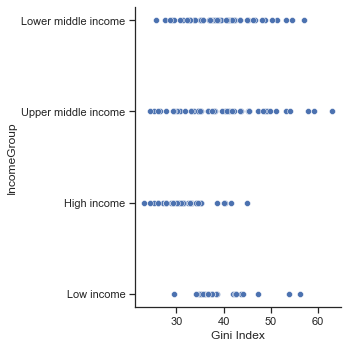

In [74]:
#seaborn initialization
sns.set(style ="ticks", rc={'figure.figsize':(15,6)}) #this won't work

# plotting a simple visualization of data points
sns.relplot(x ="Gini Index", y ="IncomeGroup", data = df)

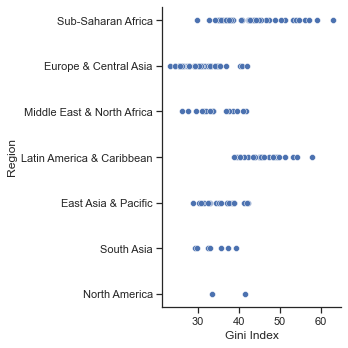

In [130]:
# plotting a simple visualization of data points
sns.relplot(x ="Gini Index", y ="Region", data = df)

<AxesSubplot:xlabel='Region', ylabel='Gini Index'>

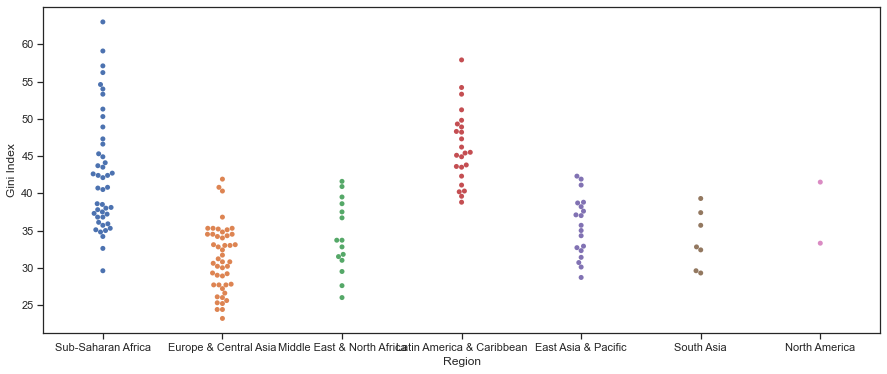

In [127]:
sns.swarmplot(x=df['Region'],
              y=df['Gini Index'])

<AxesSubplot:xlabel='Region', ylabel='Gini Index'>

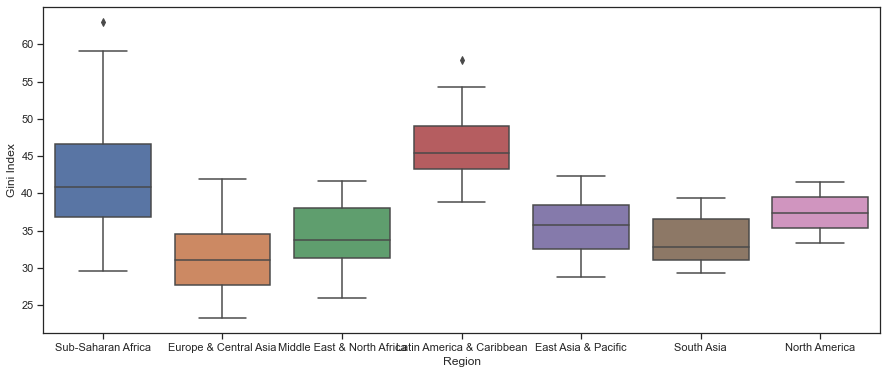

In [129]:
sns.boxplot(x="Region", y="Gini Index", data=df)

#so the median is about the same across the three groups but the high income one.

In [103]:
#setting data for line charts, set year as rows
gini_data_t = gini_data.T
unemp_data_t = unemp_data.T

new_header = gini_data_t.iloc[0] #grab the first row for the header
gini_data_t = gini_data_t[4:] #take the data less the header row
gini_data_t.columns = new_header #set the header row as the df header

new_header = unemp_data_t.iloc[0] #grab the first row for the header
unemp_data_t = unemp_data_t[4:] #take the data less the header row
unemp_data_t.columns = new_header #set the header row as the df header

<AxesSubplot:title={'center':'Gini Index from 1900s'}, xlabel='Year', ylabel='Gini Index'>

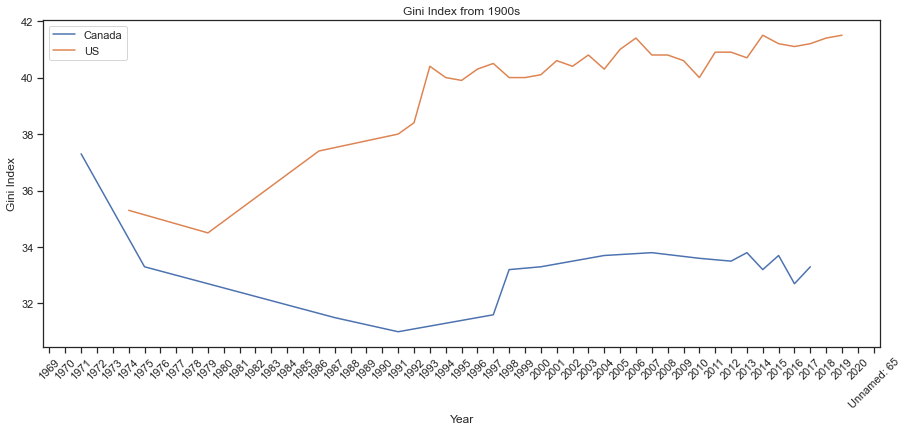

In [99]:
#plotting line charts
plt.title("Gini Index from 1900s")
plt.xlabel("Year")
plt.ylabel("Gini Index")
plt.tick_params(axis='x', rotation=45)
sns.lineplot(data=gini_data_t['Canada'], label="Canada")
sns.lineplot(data=gini_data_t['United States'], label="US")


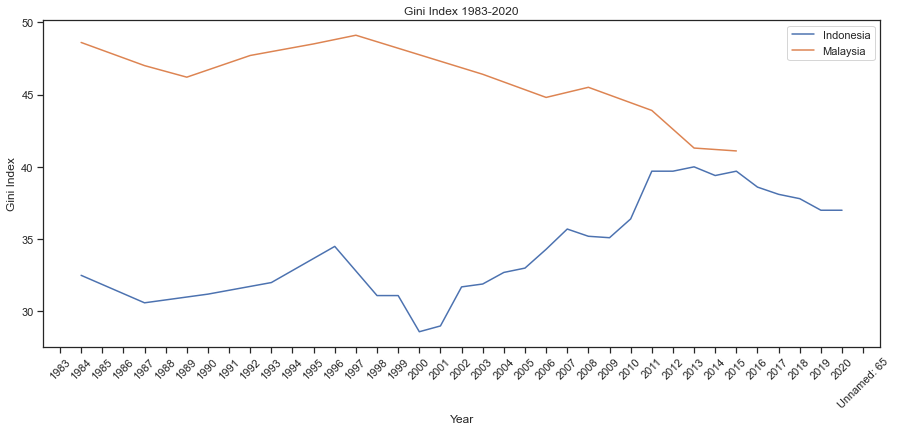

In [110]:
plt.title("Gini Index 1983-2020")
plt.xlabel("Year")
plt.ylabel("Gini Index")
sns.lineplot(data=gini_data_t['Indonesia'], label="Indonesia")
sns.lineplot(data=gini_data_t['Malaysia'], label="Malaysia")
plt.tick_params(axis='x', rotation=45)

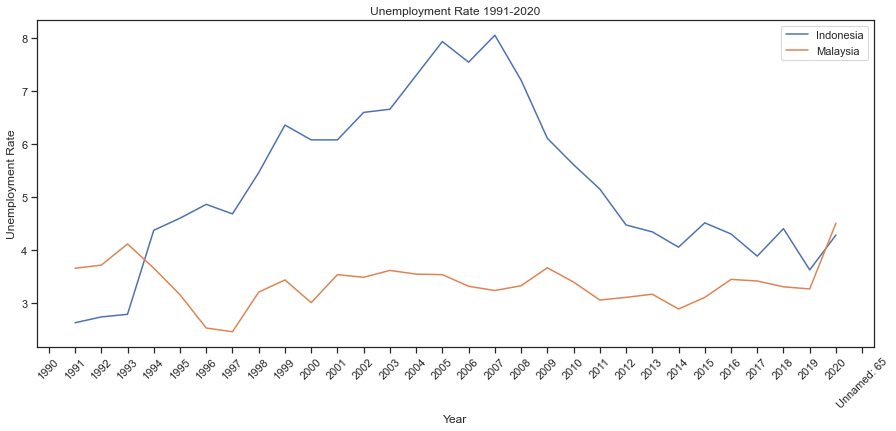

In [111]:
plt.title("Unemployment Rate 1991-2020")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
sns.lineplot(data=unemp_data_t['Indonesia'], label="Indonesia")
sns.lineplot(data=unemp_data_t['Malaysia'], label="Malaysia")
plt.tick_params(axis='x', rotation=45)

<AxesSubplot:xlabel='Gini Index', ylabel='PD'>

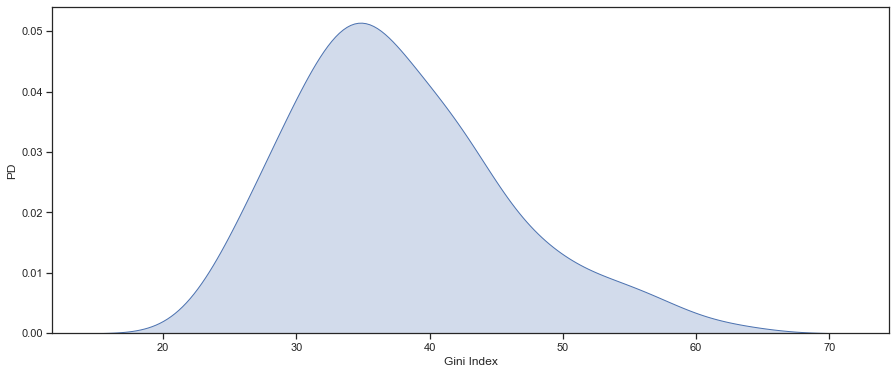

In [144]:
#sns.relplot(x ="Region", y ="IncomeGroup", data = df)
plt.ylabel("PD")
sns.kdeplot(data=df['Gini Index'], shade=True)

<AxesSubplot:xlabel='Indonesia', ylabel='PD'>

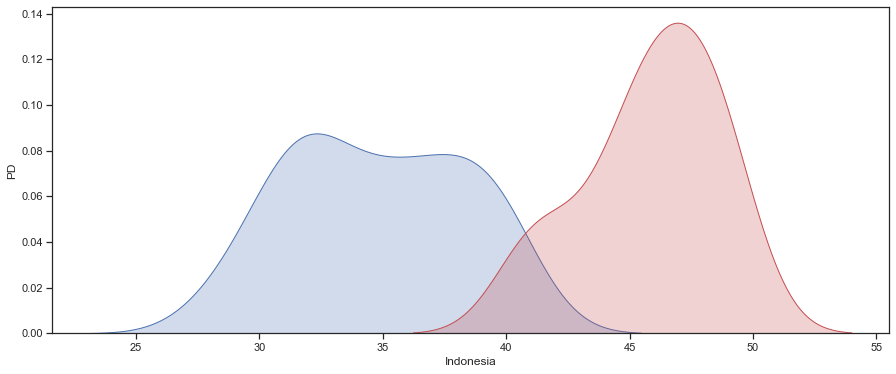

In [163]:
#sns.relplot(x ="Region", y ="IncomeGroup", data = df)
plt.ylabel("PD")
sns.kdeplot(data=gini_data_t['Indonesia'], color='b', shade=True)
sns.kdeplot(data=gini_data_t['Malaysia'], color='r', shade=True)

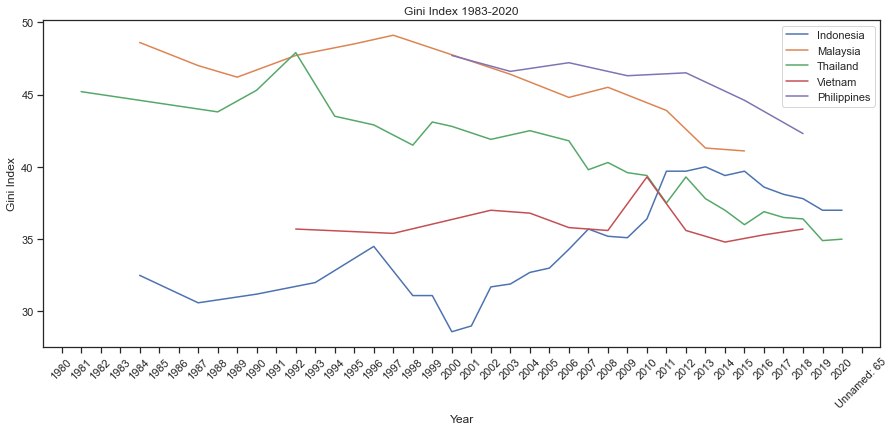

In [184]:
plt.title("Gini Index 1983-2020")
plt.xlabel("Year")
plt.ylabel("Gini Index")
sns.lineplot(data=gini_data_t['Indonesia'], label="Indonesia")
sns.lineplot(data=gini_data_t['Malaysia'], label="Malaysia")
sns.lineplot(data=gini_data_t['Thailand'], label="Thailand")
sns.lineplot(data=gini_data_t['Vietnam'], label="Vietnam")
sns.lineplot(data=gini_data_t['Philippines'], label="Philippines")
plt.tick_params(axis='x', rotation=45)

In [177]:
#to see which regions
df.Region.unique()

array(['Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'South Asia', 'North America'], dtype=object)

In [180]:
df[df["Region"]=='East Asia & Pacific']

,Country Code,Region,IncomeGroup,Country Name,Gini Index,GDP,Unemployment Rate
13,AUS,East Asia & Pacific,High income,Australia,34.3,1.327836e+12,6.460
40,CHN,East Asia & Pacific,Upper middle income,China,38.2,1.472273e+13,5.000
76,FJI,East Asia & Pacific,Upper middle income,Fiji,30.1,4.533884e+09,4.715
106,IDN,East Asia & Pacific,Lower middle income,Indonesia,37.0,1.058424e+12,4.280
118,JPN,East Asia & Pacific,High income,Japan,32.9,5.057759e+12,2.800
125,KOR,East Asia & Pacific,High income,"Korea, Rep.",31.4,1.637896e+12,3.930
128,LAO,East Asia & Pacific,Lower middle income,Lao PDR,38.8,1.913264e+10,1.034
159,MMR,East Asia & Pacific,Lower middle income,Myanmar,30.7,7.985205e+10,1.058
162,MNG,East Asia & Pacific,Lower middle income,Mongolia,32.7,1.331298e+10,7.010
168,MYS,East Asia & Pacific,Upper middle income,Malaysia,41.1,3.370061e+11,4.504
